# Task 2 : Problem 1 :--PREDICT THE TOTAL SELLING PRICE USING RANDOM FOREST REGRESSION

Import all neccary libreries for perporming data mining task

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Read the Diamond Dataset

In [ ]:
df  = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


# DATASET PREPROCESSING

Drop first unamed column beacuse it is unnecessary. So we just drop that first column


In [ ]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,...,8.66,M,STK,unknown,None,unknown,unknown,unknown,unknown,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,...,5.71,TK,XTK,unknown,None,Green,unknown,None,Fancy Light,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,...,10.20,TN,M,unknown,None,unknown,unknown,unknown,unknown,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   cut                          219703 non-null  object 
 1   color                        219703 non-null  object 
 2   clarity                      219703 non-null  object 
 3   carat_weight                 219703 non-null  float64
 4   cut_quality                  219703 non-null  object 
 5   lab                          219703 non-null  object 
 6   symmetry                     219703 non-null  object 
 7   polish                       219703 non-null  object 
 8   eye_clean                    219703 non-null  object 
 9   culet_size                   219703 non-null  object 
 10  culet_condition              219703 non-null  object 
 11  depth_percent                219703 non-null  float64
 12  table_percent                219703 non-null  float64
 13 

In [ ]:
df.head(10)

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
5,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.81,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,unknown,...,1.84,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
7,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.78,M,M,unknown,None,unknown,unknown,unknown,unknown,200
8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,...,1.85,STK,TK,unknown,None,unknown,unknown,unknown,unknown,200
9,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,...,1.80,M,M,unknown,None,unknown,unknown,unknown,unknown,200


In [ ]:
total_rows = 219703

print(df["eye_clean"].value_counts())
print("total Percentage Of 'Unknown Values'  :" , (df["eye_clean"].value_counts()['unknown']/total_rows)*100)

unknown       156916
Yes            61931
Borderline       515
E1               300
No                41
Name: eye_clean, dtype: int64
total Percentage Of 'Unknown Values'  : 71.42187407545642


In [ ]:
print(df["fancy_color_secondary_color"].value_counts())
print("total Percentage Of 'Unknown Values'  :" , (df["fancy_color_secondary_color"].value_counts()['unknown']/total_rows)*100)

unknown    218641
Brown         306
Yellow        239
Orange        155
Pink          126
Green         105
Purple         81
Gray           36
Blue           11
Violet          2
Red             1
Name: fancy_color_secondary_color, dtype: int64
total Percentage Of 'Unknown Values'  : 99.5166201644948


In [ ]:
print(df["culet_size"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["culet_size"].value_counts()['unknown']/total_rows)*100)

N          131899
unknown     85740
VS           1345
S             476
M             163
L              58
SL             14
EL              4
VL              4
Name: culet_size, dtype: int64
total Percentage Of 'Unknown Values'  : 39.02541157835805


In [ ]:
print(df["culet_condition"].value_counts())


print("total Percentage Of 'Unknown Values'  :" , (df["culet_condition"].value_counts()['unknown']/total_rows)*100)

unknown    204384
Pointed     15293
Chipped        18
Abraded         8
Name: culet_condition, dtype: int64
total Percentage Of 'Unknown Values'  : 93.02740517880957


In [ ]:
print(df["girdle_min"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["girdle_min"].value_counts()['unknown']/total_rows)*100)

unknown    83432
M          74421
STK        26335
TN         16744
TK         10353
VTK         4471
XTK         1981
VTN         1650
XTN          292
STN           24
Name: girdle_min, dtype: int64
total Percentage Of 'Unknown Values'  : 37.974902481987044


In [ ]:
print(df["girdle_max"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["girdle_max"].value_counts()['unknown']/total_rows)*100)

unknown    84295
STK        70440
TK         25186
M          17977
VTK        12638
XTK         7647
TN          1363
VTN          111
XTN           34
STN           12
Name: girdle_max, dtype: int64
total Percentage Of 'Unknown Values'  : 38.367705493325076


In [ ]:
print(df["fluor_color"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["fluor_color"].value_counts()['unknown']/total_rows)*100)

unknown    203977
Blue        15219
Yellow        400
Green          55
White          42
Orange         10
Name: fluor_color, dtype: int64
total Percentage Of 'Unknown Values'  : 92.84215509119129


In [ ]:
print(df["fancy_color_dominant_color"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["fancy_color_dominant_color"].value_counts()['unknown']/total_rows)*100)

unknown      210539
Yellow         6487
Pink           1369
Brown           531
Green           302
Orange          271
Purple           76
Gray             66
Blue             38
Chameleon        12
Black             6
Red               4
Other             2
Name: fancy_color_dominant_color, dtype: int64
total Percentage Of 'Unknown Values'  : 95.82891448910574


In [ ]:
print(df["fancy_color_intensity"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["fancy_color_intensity"].value_counts()['unknown']/total_rows)*100)

unknown          210541
Fancy              3447
Fancy Intense      1943
Fancy Light        1288
Fancy Deep          777
Fancy Vivid         714
Light               318
Faint               238
Fancy Dark          238
Very Light          199
Name: fancy_color_intensity, dtype: int64
total Percentage Of 'Unknown Values'  : 95.82982480894663


In [ ]:
print(df["fancy_color_overtone"].value_counts())

print("total Percentage Of 'Unknown Values'  :" , (df["fancy_color_overtone"].value_counts()['unknown']/total_rows)*100)

unknown      217665
None           1650
Brownish        123
Yellowish        78
Orangey          54
Pinkish          51
Greenish         47
Purplish         34
Grayish           1
Name: fancy_color_overtone, dtype: int64
total Percentage Of 'Unknown Values'  : 99.07238408214725


Given dataset Column "eye_clean","fancy_colot_secondary_color",
"culet_condition","fluor_color","fancy_color_dominant_color","fancy_color_overtone","fancy_color_intensity" these columns are having more than 70% data value are 'Unknown' so I drop that columns.

But for column "culet_size","girdle_min" and "girdle_max" these columns are drop because when we train our model including these three columns, it will give a less R2-score and provide the high RMSE error so our model became less accurate so i just drop that columns.

In [ ]:
df.drop(['eye_clean', 'fancy_color_secondary_color','culet_size','culet_condition','girdle_min','girdle_max','fluor_color','fancy_color_dominant_color','fancy_color_overtone','fancy_color_intensity'], axis=1,inplace = True)
df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,None,200
1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,None,200
2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,None,200
3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,None,200
4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,None,1210692
219699,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,None,1292500
219700,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,None,1315496
219701,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,70.8,72.0,5.22,4.90,3.47,Faint,1350000


### Replacing 'Unknown' by it's Mode

In [ ]:
df.loc[df["color"] == "unknown", "color"] = "E"

count = df["color"].value_counts()
count

E    42265
F    31566
D    30873
G    29184
H    26073
I    22364
J    16898
K    11750
L     5683
M     3047
Name: color, dtype: int64

In [ ]:
df.loc[df["cut_quality"] == "unknown", "cut_quality"] = "Excellent"

count = df["cut_quality"].value_counts()
count

Excellent    185468
Very Good     34201
Good             28
Fair              5
Ideal             1
Name: cut_quality, dtype: int64

In [ ]:
df.loc[df["fluor_intensity"] == "unknown", "fluor_intensity"] = "None"

count = df["fluor_intensity"].value_counts()
count

None           143619
Faint           38302
Medium          20705
Strong          13243
Very Slight      2729
Very Strong      1093
Slight             12
Name: fluor_intensity, dtype: int64

## Encoding the Columns

We are doing Label Encoding because it is Ordinal Data

In [ ]:
label_mapping_clarity = {"I3": 0, "I2": 1, "I1": 2,"SI3":3,"SI2":4,"SI1":5,"VS2":6,"VS1":7,"VVS2":8,"VVS1":9,"IF":10}
df = df.replace({"clarity": label_mapping_clarity})

label_mapping_cut_quality = {"Fair": 0, "Good": 1, "Very Good": 2,"Excellent":3,"Ideal":4}
df = df.replace({"cut_quality": label_mapping_cut_quality})

label_mapping_symmetry = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
df = df.replace({"symmetry": label_mapping_symmetry})

label_mapping_polish = {"Poor":0,"Fair": 1, "Good": 2, "Very Good": 3,"Excellent":4}
df = df.replace({"polish": label_mapping_polish})

label_mapping_fluor_intensity = {"None":0,"Faint": 1, "Very Slight": 2, "Slight": 3,"Medium":4,"Strong":5,"Very Strong":6}
df = df.replace({"fluor_intensity": label_mapping_fluor_intensity})

label_mapping_cut = {"Round":0,"Oval": 1, "Emerald": 2, "Pear": 3,"Princess":4,"Radiant":5,"Heart":6,"Cushion Modified":7,"Marquise":8,"Asscher":9,"Cushion":10}
df = df.replace({"cut": label_mapping_cut})

label_mapping_color = {"E":0,"F": 1, "D": 2, "G": 3,"H":4,"I":5,"J":6,"K":7,"L":8,"M":9}
df = df.replace({"color": label_mapping_color})

label_mapping_lab = {"GIA":0,"IGI": 1, "HRD": 2}
df = df.replace({"lab": label_mapping_lab})

df

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
0,0,0,8,0.09,3,1,3,3,62.7,59.0,2.85,2.87,1.79,0,200
1,0,0,8,0.09,2,1,3,3,61.9,59.0,2.84,2.89,1.78,0,200
2,0,0,8,0.09,3,1,3,3,61.1,59.0,2.88,2.90,1.77,0,200
3,0,0,8,0.09,3,1,3,3,62.0,59.0,2.86,2.88,1.78,0,200
4,0,0,8,0.09,2,1,3,4,64.9,58.5,2.79,2.83,1.82,0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0,0,7,10.65,3,0,4,4,61.3,58.0,14.06,14.18,8.66,0,1210692
219699,5,0,6,5.17,3,0,3,3,64.8,65.0,11.55,8.81,5.71,0,1292500
219700,0,0,7,18.07,3,0,4,4,60.2,59.0,17.06,17.10,10.20,0,1315496
219701,4,0,4,0.90,3,0,2,2,70.8,72.0,5.22,4.90,3.47,1,1350000


Finding Correlation


In [ ]:
df.corr()

,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,fluor_intensity,total_sales_price
cut,1.000000,-0.122227,-0.058612,0.223696,0.200302,-0.045893,-0.439873,-0.228713,0.137397,0.171490,0.293032,0.065676,0.065093,-0.009864,0.105772
color,-0.122227,1.000000,-0.004599,0.117848,-0.069264,0.154788,0.124657,0.083385,-0.004671,-0.000710,0.131961,0.185869,0.073791,0.040948,-0.011515
clarity,-0.058612,-0.004599,1.000000,-0.105747,0.068048,0.005184,0.132085,0.126664,0.009812,0.012751,-0.153244,-0.139439,-0.055404,-0.048604,0.009665
carat_weight,0.223696,0.117848,-0.105747,1.000000,0.066330,0.123062,-0.065552,-0.012959,0.061724,0.090697,0.782683,0.788912,0.350719,0.039323,0.745963
cut_quality,0.200302,-0.069264,0.068048,0.066330,1.000000,-0.049259,0.222693,0.137992,0.038191,0.063960,0.115666,0.018236,0.003629,-0.006390,0.047122
lab,-0.045893,0.154788,0.005184,0.123062,-0.049259,1.000000,0.030227,-0.010977,-0.235559,-0.097961,0.083739,0.116359,0.092396,-0.079739,0.038314
symmetry,-0.439873,0.124657,0.132085,-0.065552,0.222693,0.030227,1.000000,0.444465,-0.052883,-0.051737,-0.139313,0.063619,0.004160,-0.013833,-0.020466
polish,-0.228713,0.083385,0.126664,-0.012959,0.137992,-0.010977,0.444465,1.000000,0.020841,-0.004962,-0.048063,0.073572,0.011241,-0.029907,-0.008245
depth_percent,0.137397,-0.004671,0.009812,0.061724,0.038191,-0.235559,-0.052883,0.020841,1.000000,0.673835,0.128791,0.119692,0.086477,0.011676,0.025408
table_percent,0.171490,-0.000710,0.012751,0.090697,0.063960,-0.097961,-0.051737,-0.004962,0.673835,1.000000,0.165742,0.141250,0.082533,0.005088,0.045192


Spliting Independent Columns and Dependent Column

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X,y)


[[ 0.    0.    8.   ...  2.87  1.79  0.  ]
 [ 0.    0.    8.   ...  2.89  1.78  0.  ]
 [ 0.    0.    8.   ...  2.9   1.77  0.  ]
 ...
 [ 0.    0.    7.   ... 17.1  10.2   0.  ]
 [ 4.    0.    4.   ...  4.9   3.47  1.  ]
 [ 3.    0.    8.   ... 11.09  7.39  0.  ]] [    200     200     200 ... 1315496 1350000 1449881]


Doing OneHot Encoding in columns "cut" , "color" and "lab"

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X


array([[ 1.  ,  0.  ,  0.  , ...,  2.87,  1.79,  0.  ],
       [ 1.  ,  0.  ,  0.  , ...,  2.89,  1.78,  0.  ],
       [ 1.  ,  0.  ,  0.  , ...,  2.9 ,  1.77,  0.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 17.1 , 10.2 ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  4.9 ,  3.47,  1.  ],
       [ 0.  ,  0.  ,  0.  , ..., 11.09,  7.39,  0.  ]])

In [ ]:
y = y.reshape(len(y),1)
y

array([[    200],
       [    200],
       [    200],
       ...,
       [1315496],
       [1350000],
       [1449881]])

## DATA TRANSFORMATION

Standardizing the whole dataset except depandent Column 'total_sells_preice'

In [ ]:
from sklearn.preprocessing import Normalizer
sc_X = Normalizer()
X = sc_X.fit_transform(X)

# RANDOM FOREST REGRESSOR MODEL BUILDING

Import The Random Forest Regressor and GridSearchCV to train the model

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor



Split the Trainset and Testset in ratio of 80 and 20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


Train the Model using train set and predict the value by using test set.After that finding the R2-score, RMSE error and Relative RMSE

In [ ]:
regessor = RandomForestRegressor(n_estimators = 10,random_state =0)
regessor.fit(X_train,y_train)


y_pred = regessor.predict(X_test)

<ipython-input-28-ae81e2ca3881>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regessor.fit(X_train,y_train)


# MODEL EVALUTION

Fiding R2-Score and ERROR "RMSE","MAE","MSE"

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

a=r2_score(y_test, y_pred)
print(f"R-squared= {a}")

e = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",e)


rmse=np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f"RMSE= {rmse}")


relative_rmse=(rmse/df['total_sales_price'].mean())*100
print(f"Relative_RMSE = {relative_rmse}")

R-squared= 0.8525009772275217
Mean Absolute Error =  1300.7895871209205
RMSE= 101.16184396453203
Relative_RMSE = 1.4644026202648324


# MODEL OPTIMIZATION

### Hyperparameter Tunning using Grid Search

Here set all neccassary parameters by some range of values

**NOTE**:-- Before i am just providing the 4 differant values for all five hyperparameter but it will amost 3 hours and after that i found out that best parameter values so here i just mention that parameter with some near values.

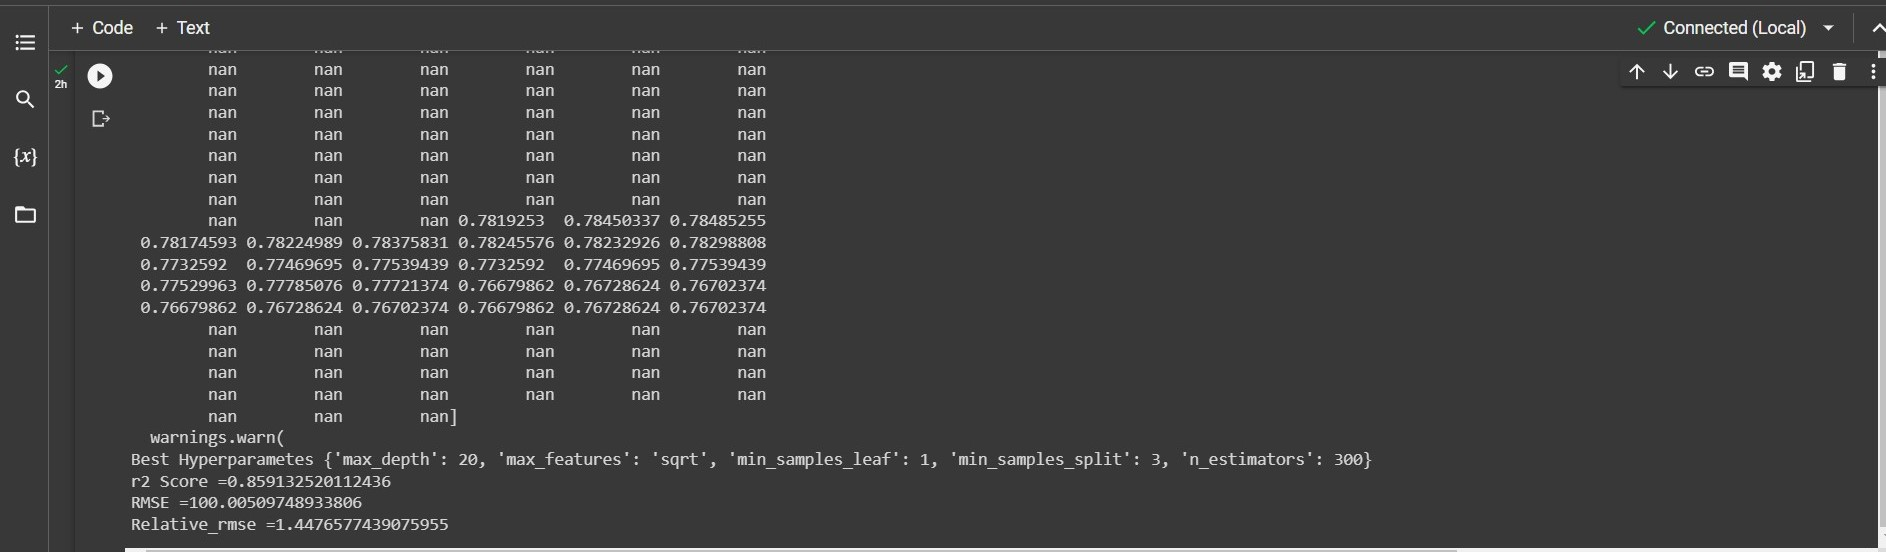

I am also uploading the screenshot for that parameter

this are the parameter of old one:-

parameter_grid= {
 'n_estimators':[100,200,300],
 'max_depth':[10,15,20],
 'min_samples_split':[3,4,5],
 'min_samples_leaf':[1,2,3],
 'max_features':['auto','sqrt','log']
}

In [ ]:
parameter_grid= {
 'n_estimators':[200,300],
 'max_depth':[15,20],
 'min_samples_split':[3,4],
 'min_samples_leaf':[1,2],
 'max_features':['sqrt','log']
}



Here, For the optimization we use Grid Search Technique to find the Optimal hyperparameter so that it will give the best r2-score and less RMSE value so that our model predict best total sells price

In [ ]:

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_regressor,param_grid=parameter_grid,scoring='r2',cv=5,n_jobs=-1)

grid_search.fit(X_train,y_train)

print("Best Hyperparametes",grid_search.best_params_)

best_rf_regressor = grid_search.best_estimator_


y_pred = best_rf_regressor.predict(X_test)



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_f

Best Hyperparametes {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


### **Best Hyperparametes**
'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300

# MODEL EVALUTION AFTER HYPERPARAMETER TUNING

Finding R2-Score and ERROR for best hyperparameter values.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

a=r2_score(y_test, y_pred)
print(f"R-squared= {a}")

e = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error = ",e)


rmse=np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
print(f"RMSE= {rmse}")


relative_rmse=(rmse/df['total_sales_price'].mean())*100
print(f"Relative_RMSE = {relative_rmse}")

R-squared= 0.8322517207365254
Mean Absolute Error =  1620.06483725908
RMSE= 104.46816582342296
Relative_RMSE = 1.5122644049442053
